<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/02w_ch04_dataframe_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**

## 02주 2024-0318-월

### 패키지 설치 확인

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.25.2
1.5.3
0.13.1


## 코랩에서 한글 표시를 위한 패키지 설치

In [2]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.7 MB/s eta 0:00:00


### 그림 파일 dpi 설정과 표시화면 해상도 선명하게

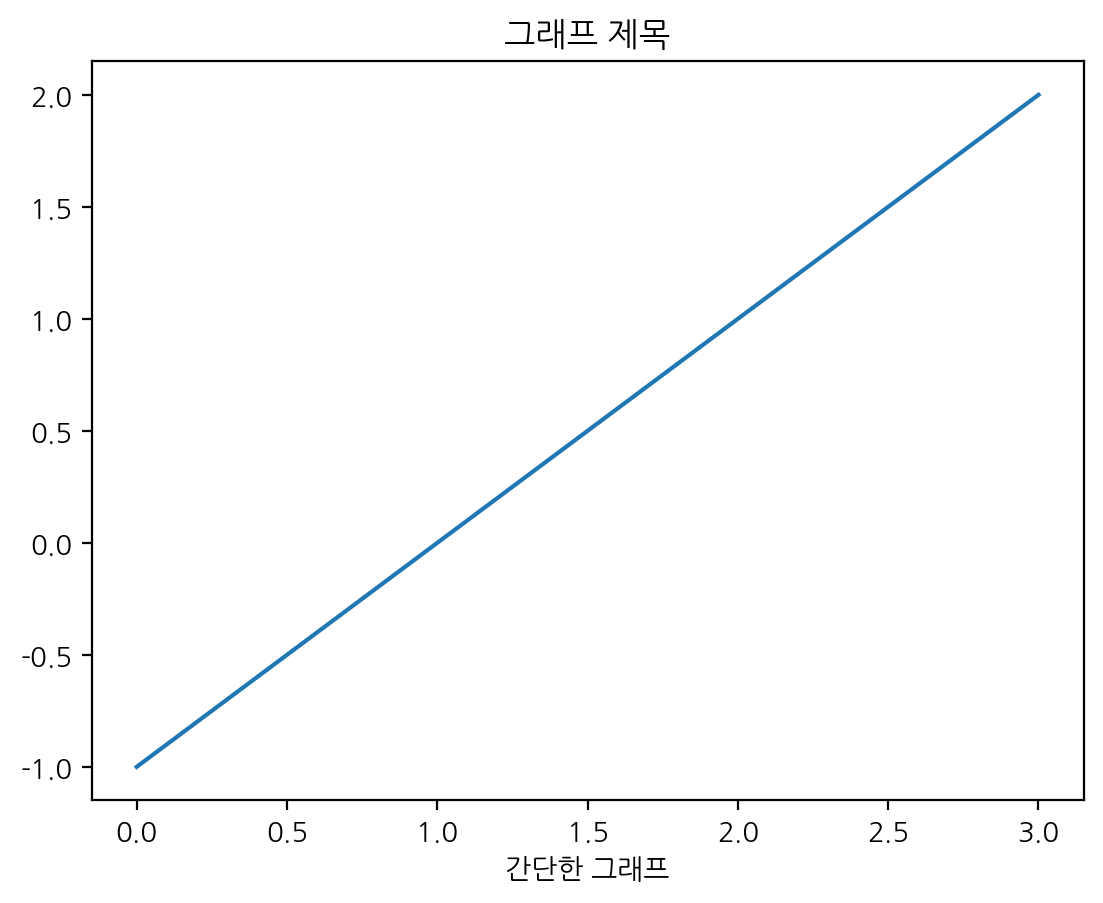

In [4]:
# 그림 파일 dpi 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})

# 표시화면 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목')
plt.xlabel('간단한 그래프')
plt.show()

## 데이터분석을 위한 seaborn 내장(토이) 데이터, titanic

In [6]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

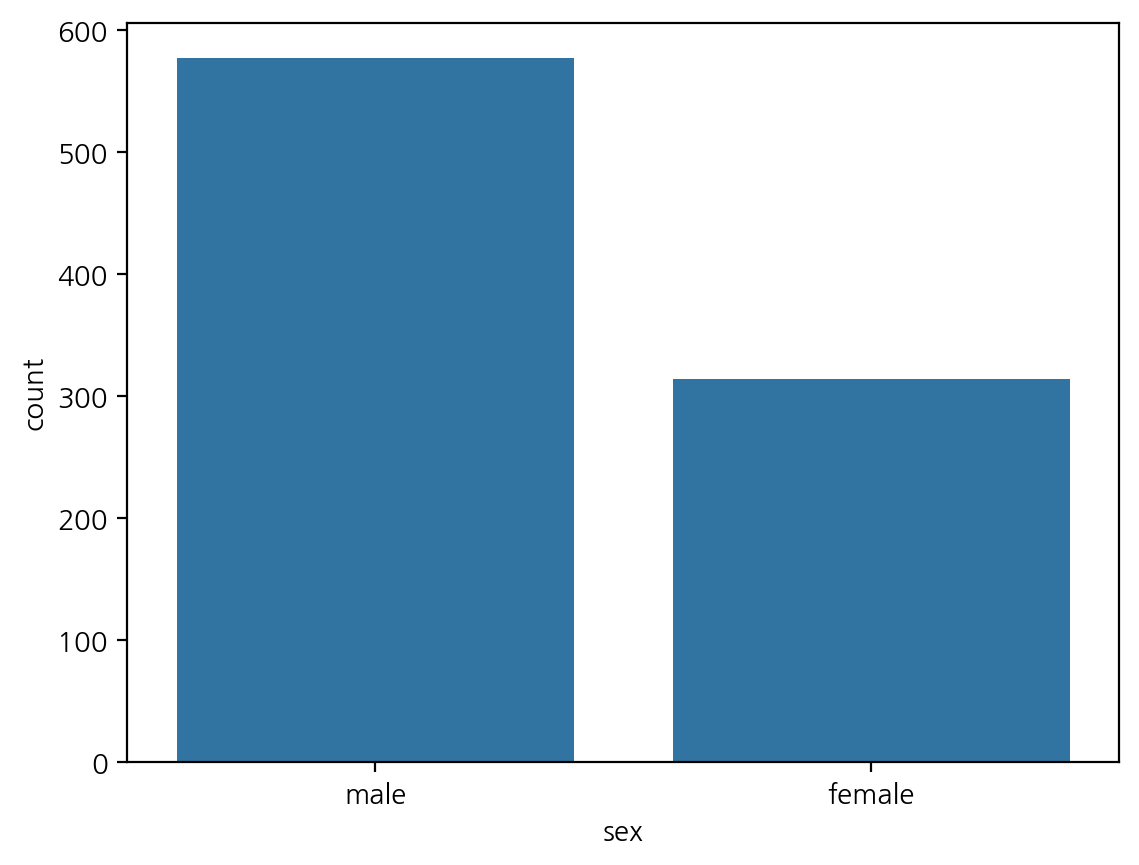

In [8]:
sns.countplot(titanic, x='sex');

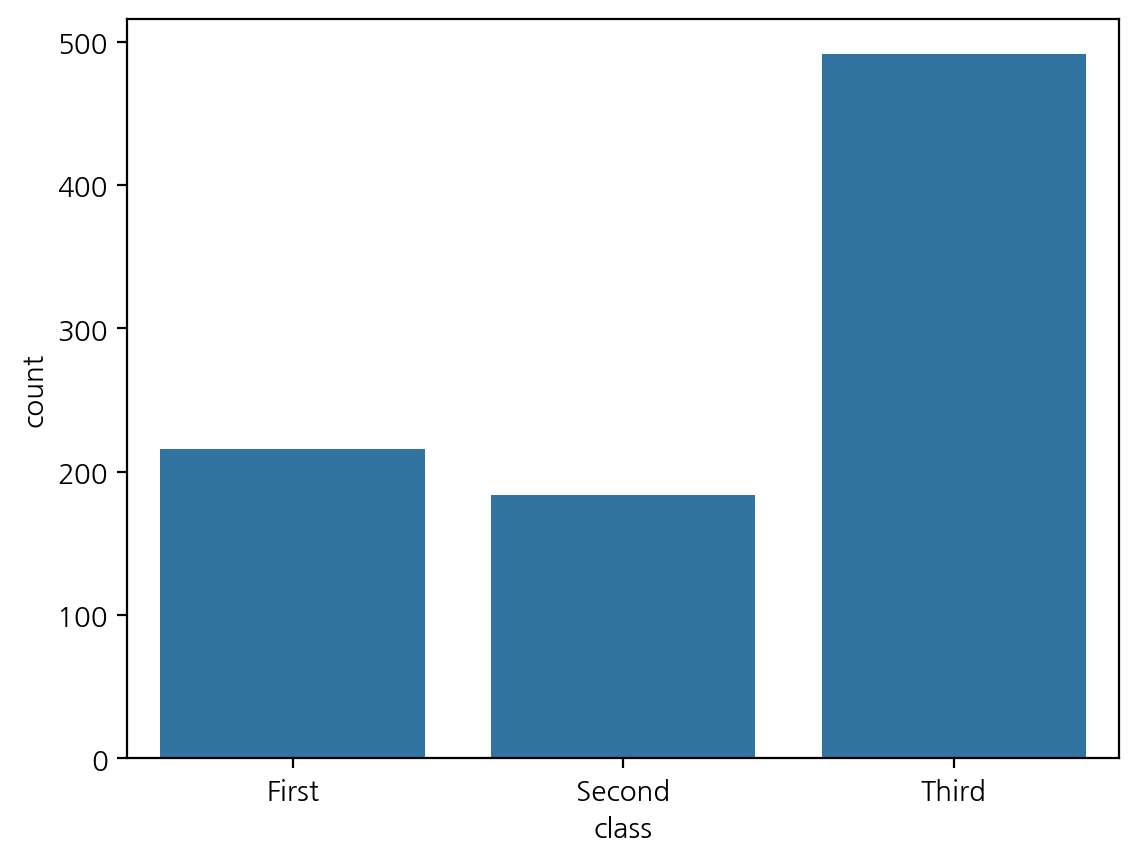

In [9]:
sns.countplot(titanic, x = 'class');

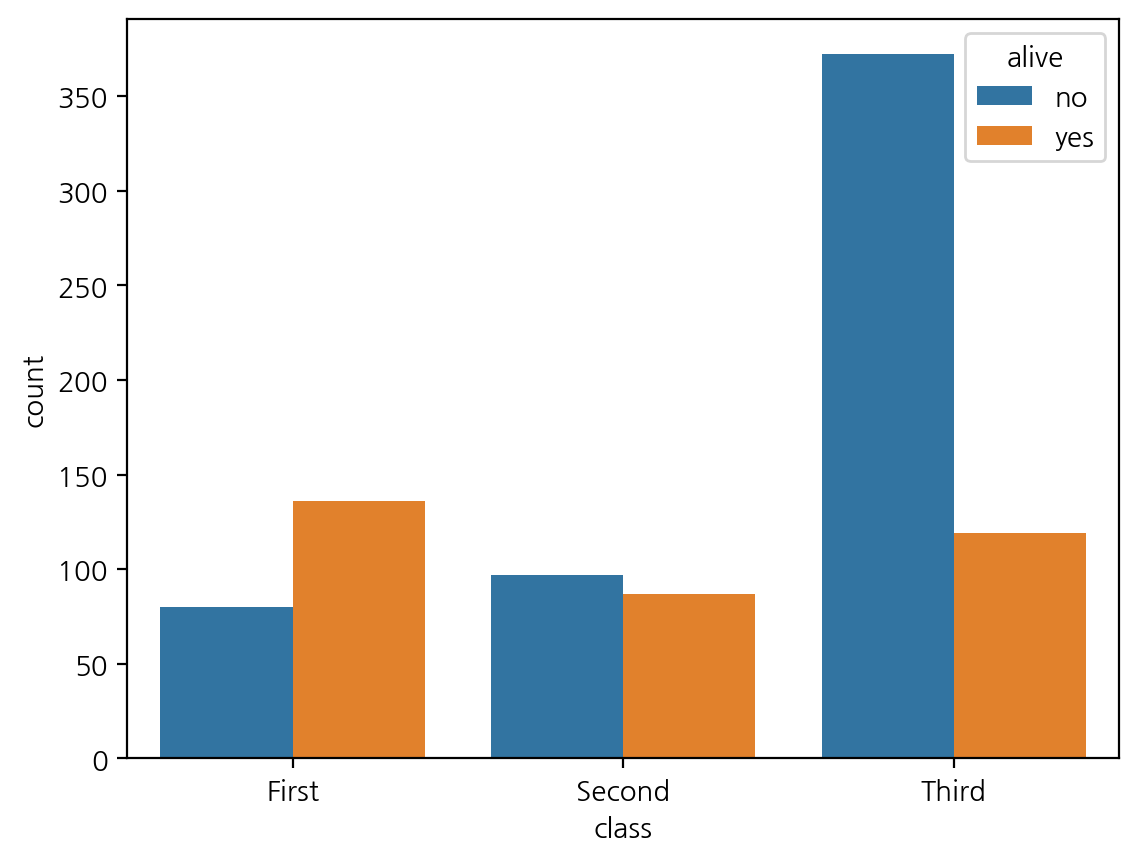

In [10]:
sns.countplot(data = titanic, x = 'class', hue = 'alive');  # x축 class, alive별 색 표현

In [12]:
titanic.pclass.unique()

array([3, 1, 2])

In [16]:
titanic.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [14]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
titanic.pclass.value_counts()

In [17]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [21]:
titanic[['pclass', 'who']].values

array([[3, 'man'],
       [1, 'woman'],
       [3, 'woman'],
       ...,
       [3, 'woman'],
       [1, 'man'],
       [3, 'man']], dtype=object)

In [22]:
titanic[['pclass', 'who']].values.ravel()

array([3, 'man', 1, ..., 'man', 3, 'man'], dtype=object)

In [20]:
pd.unique(titanic[['pclass', 'who']].values.ravel())

array([3, 'man', 1, 'woman', 'child', 2], dtype=object)

In [23]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [24]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


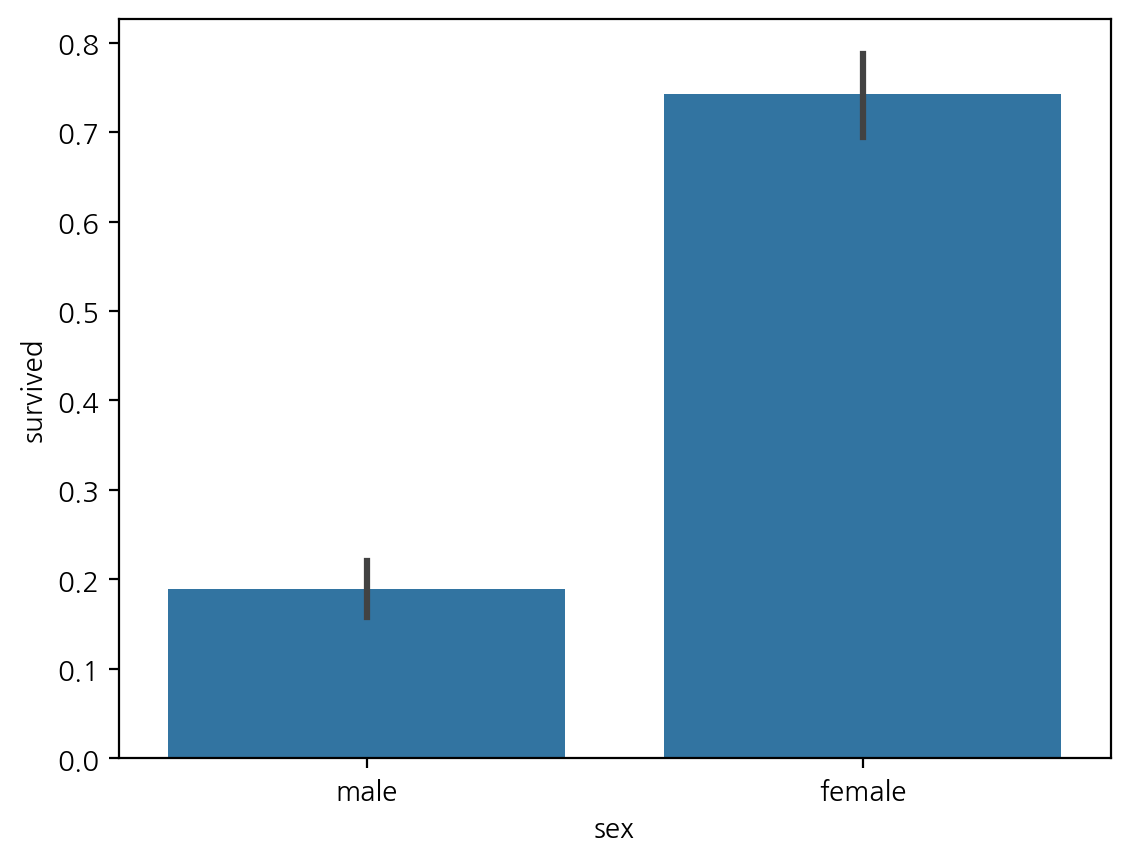

In [25]:
sns.barplot(x="sex", y="survived", data=titanic);

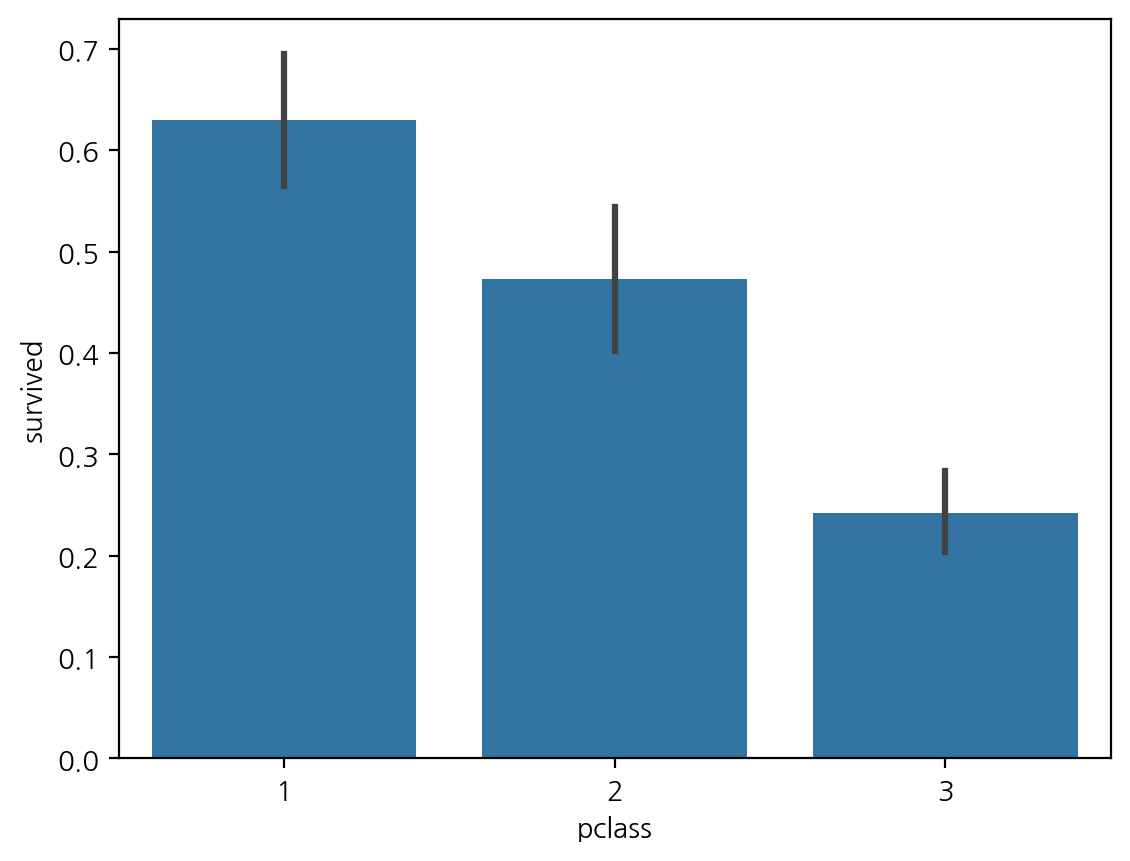

In [26]:
sns.barplot(x="pclass", y="survived", data=titanic);

# 둘째마당. 본격 실습! 데이터 갖고 놀기
---
---


# 04 데이터 프레임의 세계로!

## 04-2 데이터 프레임 만들기 - 시험 성적 데이터를 만들어 보자!

### 데이터 입력해 데이터 프레임 만들기


**1. `pandas` 패키지 로드하기**



In [ ]:
import pandas as pd

**2. 데이터 프레임 만들기**





In [ ]:
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박동현,60,100
3,김민지,70,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   english  4 non-null      int64 
 2   math     4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [ ]:
df.describe()

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


### 데이터 프레임으로 분석하기


#### 특정 변수의 값 추출하기



In [ ]:
df['english']

0    90
1    80
2    60
3    70
Name: english, dtype: int64

#### 변수의 값으로 합계 구하기



In [ ]:
sum(df['english'])

300

In [ ]:
sum(df['math'])

230

#### 변수의 값으로 평균 구하기

In [ ]:
sum(df['english']) / 4  # 영어 점수 평균

75.0

In [ ]:
sum(df['math']) / 4     # 수학 점수 평균

57.5

In [ ]:
df.sum()

name       김지훈이유진박동현김민지
english             300
math                230
dtype: object

In [ ]:
df.sum(numeric_only=True)

english    300
math       230
dtype: int64

In [ ]:
df.sum(axis=0, numeric_only=True)

english    300
math       230
dtype: int64

In [ ]:
df.mean(axis=0, numeric_only=True)

english    75.0
math       57.5
dtype: float64

In [ ]:
df.mean(axis='columns', numeric_only=True)

0    70.0
1    70.0
2    80.0
3    45.0
dtype: float64

In [ ]:
df.sum(axis=1)

<ipython-input-15-f6cc363c055e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


0    140
1    140
2    160
3     90
dtype: int64

In [ ]:
df.sum(axis='columns', numeric_only=True)

0    140
1    140
2    160
3     90
dtype: int64

In [ ]:
df.mean(axis='columns', numeric_only=True)

0    70.0
1    70.0
2    80.0
3    45.0
dtype: float64

## *혼자서 해보기*

In [ ]:
mydf = pd.DataFrame({'제품': ['사과', '딸기', '수박'],
                     '가격': [1800, 1500, 3000],
                     '판매량': [24, 38, 13]})
mydf

,제품,가격,판매량
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


In [ ]:
mydf.sum(numeric_only=True)

가격     6300
판매량      75
dtype: int64

In [ ]:
mydf.mean(numeric_only=True)

가격     2100.0
판매량      25.0
dtype: float64

In [ ]:
mydf.sum(axis=1, numeric_only=True)

0    1824
1    1538
2    3013
dtype: int64

In [ ]:
mydf.mean(axis=1, numeric_only=True)

0     912.0
1     769.0
2    1506.5
dtype: float64

In [ ]:
mydf['총액'] = mydf['가격'] * mydf['판매량']
mydf

,제품,가격,판매량,총액
0,사과,1800,24,43200
1,딸기,1500,38,57000
2,수박,3000,13,39000


---
## 04-3 외부 데이터 이용하기 - 축적된 시험 성적 데이터를 불러오자!

### 엑셀 파일 불러오기


#### 1. 엑셀 파일 살펴보기




#### 2. 워킹 디렉터리에 엑셀 파일 삽입하기


#### 3. 엑셀 파일 불러오기

- 먼저 준비된 파일을 구글 드라이브에 업로드(드래그 & 드롭)

In [ ]:
df_exam = pd.read_excel('excel_exam.xlsx')  # 엑셀 파일을 불러와 df_exam에 할당
df_exam                                     # 출력

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


#### 4. 분석하기

In [ ]:
sum(df_exam['english']) / 20

84.9

In [ ]:
df_exam['english'].mean()

84.9

In [ ]:
sum(df_exam['science']) / 20

59.45

In [ ]:
df_exam['science'].mean()

59.45

In [ ]:
# 변수의 값 개수 구하기
x = [1, 2, 3, 4, 5]
x

[1, 2, 3, 4, 5]

In [ ]:
len(x)

5

In [ ]:
# 데이터 프레임의 행 개수 구하기
df = pd.DataFrame({'a' : [1, 2, 3],
                   'b' : [4, 5, 6]})
df

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
len(df)

3

In [ ]:
len(df_exam)                          # df_exam의 행 개수 구하기

20

In [ ]:
sum(df_exam['english']) / len(df_exam)  # english 합계를 행 개수로 나누기

84.9

In [ ]:
sum(df_exam['science']) / len(df_exam)  # science 합계를 행 개수로 나누기

59.45

#### 엑셀 파일의 첫 번째 행이 변수명이 아니라면?


In [ ]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx')
df_exam_novar

,1,1.1,50,98,50.1
0,2,1,60,97,60
1,3,2,25,80,65
2,4,2,50,89,98
3,5,3,20,98,15
4,6,3,50,98,45
5,7,4,46,98,65
6,8,4,48,87,12


In [ ]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx', header = None)
df_exam_novar

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


#### 엑셀 파일에 시트가 여러 개 있다면?

In [ ]:
# Sheet2 시트의 데이터 불러오기
df_exam = pd.read_excel('excel_exam.xlsx', sheet_name = 'Sheet2')
df_exam.head()

,id,nclass,math,english,science
0,1,1,100,100,98
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
# 세 번째 시트의 데이터 불러오기
df_exam = pd.read_excel('excel_exam.xlsx', sheet_name = 2)
df_exam.head()

,id,nclass,math,english,science
0,1,1,100,100,98
1,2,1,90,90,90
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


### CSV 파일 불러오기

#### 1. 워킹 디렉터리에 CSV 파일 삽입하기


#### 2. CSV 파일 불러오기



In [ ]:
df_csv_exam = pd.read_csv('exam.csv')
df_csv_exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


### 데이터 프레임을 CSV 파일로 저장하기


#### 1. 데이터 프레임 만들기

In [ ]:
df_midterm = pd.DataFrame({'english' : [90, 80, 60, 70],
                           'math'    : [50, 60, 100, 20],
                           'nclass'  : [1, 1, 2, 2]})
df_midterm

,english,math,nclass
0,90,50,1
1,80,60,1
2,60,100,2
3,70,20,2


#### 2. CSV 파일로 저장하기



In [ ]:
df_midterm.to_csv('output_newdata.csv')

In [ ]:
df_midterm.to_csv('output_newdata_noindex.csv', index = False)

---

### 정리하기

In [ ]:
# 1. 데이터 프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})


# 2.외부 데이터 이용하기

# 엑셀 파일 불러오기
df_exam = pd.read_excel('excel_exam.xlsx')

# CSV 파일 불러오기
df_csv_exam = pd.read_csv('exam.csv')

# CSV 파일로 저장하기
df_midterm.to_csv('output_newdata.csv')